In [57]:
import numpy as np
import pandas as pd

In [58]:
data = pd.read_csv('./data/Merged-Formatted-Indian-Names.csv')

In [59]:
data.head()

,name,gender
0,barjraj,m
1,ramdin verma,m
2,sharat chandran,m
3,birender mandal,m
4,amit,m


In [60]:

data.shape

(31209, 2)

In [61]:
data.columns

Index(['name', 'gender'], dtype='object')

In [62]:
data.dtypes

name      object
gender    object
dtype: object

In [63]:
data = data.dropna()

In [64]:
data = data.reset_index(drop=True)

In [65]:
data.size

62418

In [66]:
data[data['gender'] == 'm'].size

31114

In [67]:
data[data['gender'] == 'f'].size

31304

In [68]:
data_names = data

In [69]:
data_names.size

62418

## Unisex: 0; Female: 1; Male: 2

In [70]:
data_names['gender'].replace({'f': 1,'m': 2},inplace=True)

In [71]:
data_names['gender'].unique()

array([2, 1], dtype=int64)

In [72]:
data_names.dtypes

name      object
gender     int64
dtype: object

In [73]:
name_data = data_names['name']
training_labels = data_names['gender']

In [74]:
name_data[name_data.isna()].size

0

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
cv = CountVectorizer()
training_data = cv.fit_transform(name_data)

In [77]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(training_data, training_labels, random_state =42, test_size= 0.30)

In [78]:
print('Training Set: ', train_set.shape[0])
print('Test Set: ', test_set.shape[0])
print('Training Labels: ', train_labels.shape[0])
print('Test Labels: ', test_labels.shape[0])

Training Set:  21846
Test Set:  9363
Training Labels:  21846
Test Labels:  9363


In [79]:
train_dist = train_labels.value_counts()
test_dist = test_labels.value_counts()
all_disease = training_labels.unique()

gender_dict = {"Gender": [], "Training": [], "Testing": []}
for d in all_disease:
    gender_dict['Gender'].append(d)
    gender_dict['Training'].append(train_dist[d])
    gender_dict['Testing'].append(test_dist[d])

gender_dict_df = pd.DataFrame(gender_dict)
gender_dict_df
gender_dict_df.to_csv('./data/gender_distribution.csv', index=False)

In [80]:
from sklearn.naive_bayes import MultinomialNB

In [81]:
clf = MultinomialNB()
clf.fit(train_set, train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Training accuracy

In [82]:
clf.score(train_set,train_labels)*100

97.13906435960816

## Test accuracy

In [83]:
clf.score(test_set,test_labels)*100

90.41973726369753

## Prediction on new data

In [84]:
sample_name = ["Rahul"]
vect = cv.transform(sample_name).toarray()

In [85]:
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [86]:
clf.predict(vect)

array([2], dtype=int64)

In [28]:
def predictGender(a):
    test_name = [a]
    vector = cv.transform(test_name).toarray()
    prediction = clf.predict(vector)
    if clf.predict(vector)[0] == 1:
        print("Unisex")
    elif clf.predict(vector)[0] == 2:
        print("Female")
    elif clf.predict(vector)[0] == 2:
        print("Male")
    else:
        print("Unknown")

In [29]:
predictGender("subir bandyopadhyay")

Male


In [86]:
predictGender("anna durai")

Male


In [88]:
predictGender("soumya dey")

Male


In [89]:
predictGender("arundhati roy")

Male


In [90]:
predictGender("deepika padukon")

Female


In [91]:
predictGender("manmohan singh")

Male


In [92]:
predictGender("virat kohli")

Male


In [93]:
predictGender("purnendu paul")

Male


In [94]:
predictGender("anik ghoshal")

Male


In [87]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [88]:
predictions = clf.predict(test_set)

In [89]:
accuracy_score(test_labels, predictions)*100

90.41973726369753

In [90]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           1       0.87      0.95      0.91      4648
           2       0.95      0.86      0.90      4715

    accuracy                           0.90      9363
   macro avg       0.91      0.90      0.90      9363
weighted avg       0.91      0.90      0.90      9363



In [91]:
report = classification_report(test_labels, predictions, output_dict=True)

In [93]:
report_df = pd.DataFrame(report)

In [95]:
report_df.T.to_csv('./data/classification_report_nb.csv')

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

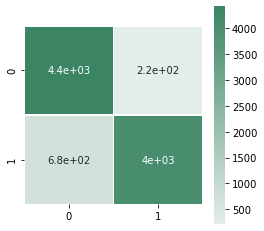

In [102]:
f, ax = plt.subplots(figsize = (4, 4))
c_matrix = confusion_matrix(test_labels, predictions)
c_map = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix, center = 0, cmap=c_map, annot= True, square = True, linewidths= 0.5)
plt.savefig('./plots/cf-matrix.jpg', dpi=2400)

In [102]:
from joblib import dump, load
dump(clf, './model/nb-classifier.joblib')

['./model/nb-classifier.joblib']